# CNN (Conventional Neural Network)

##### CIFAR-10 Image Classification with CNN

*This project implements a Convolutional Neural Network (CNN) with batch normalization, dropout, and data augmentation to classify images from the CIFAR-10 dataset into 10 categories (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck). The model is trained with early stopping and learning rate reduction, achieving accurate predictions and providing visualization of class probabilities for sample images.*


In [31]:
# Import required libraries
import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
x_train[444].shape

(32, 32, 3)

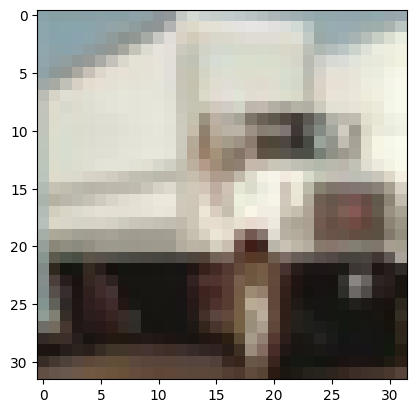

In [ ]:
# Show a sample image
plt.imshow(x_train[444])

In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Normalize dataset (mean = 0, std = 1)
mean = np.mean(x_train, axis=(0, 1, 2), keepdims=True)
std = np.std(x_train, axis=(0, 1, 2), keepdims=True) + 1e-7

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [ ]:
# Convert labels to one-hot encoding
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
# Build CNN model with Batch Normalization and Dropout
from tensorflow.keras.layers import BatchNormalization

model_2 = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]),
    BatchNormalization(), Activation('relu'),
    Conv2D(32, (3,3), padding='same'),
    BatchNormalization(), Activation('relu'),
    MaxPooling2D((2,2)), Dropout(0.25),

    Conv2D(64, (3,3), padding='same'),
    BatchNormalization(), Activation('relu'),
    Conv2D(64, (3,3), padding='same'),
    BatchNormalization(), Activation('relu'),
    MaxPooling2D((2,2)), Dropout(0.25),

    Flatten(),
    Dense(512), BatchNormalization(), Activation('relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile model
opt = keras.optimizers.Adam(
    learning_rate=1e-3
)

model_2.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Train the model with callbacks
batch_size = 64        
epochs = 50

history = model_2.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[
        keras.callbacks.ReduceLROnPlateau(
            factor=0.5, 
            patience=5,
            min_lr=1e-5, verbose=1),
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 130s 164ms/step - accuracy: 0.4797 - loss: 1.4826 - val_accuracy: 0.6113 - val_loss: 1.1091 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 180s 212ms/step - accuracy: 0.6231 - loss: 1.0653 - val_accuracy: 0.6875 - val_loss: 0.9142 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 164s 210ms/step - accuracy: 0.6667 - loss: 0.9450 - val_accuracy: 0.7166 - val_loss: 0.8066 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 184ms/step - accuracy: 0.6946 - loss: 0.8693 - val_accuracy: 0.7365 - val_loss: 0.7295 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 170ms/step - accuracy: 0.7122 - loss: 0.8120 - val_accuracy: 0.7248 - val_loss: 0.7888 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 156s 200ms/step - accuracy: 0.7299 - loss: 0.7724 - val_accuracy: 0.7438 - val_loss: 0.7656 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 203s 260ms/step - accura

In [ ]:
# Evaluate model performance
y_test_trans = np.argmax(y_test, axis=1)

y_pred = np.argmax(model_2.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [ ]:
# Print classification results
def print_accuracy_result(y_test, y_pred):
    clsf_report = pd.DataFrame(
        classification_report(y_test, y_pred, output_dict=True)
    )
    print(
        f'Accuracy Score: {accuracy_score(y_test_trans, y_pred)}\n'
        f'======================================================\n'
        f'Classification Report: {clsf_report}\n'
        f'======================================================\n'
        f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}'
    )

In [13]:
print_accuracy_result(
    y_test=y_test_trans,
    y_pred=y_pred
)

Accuracy Score: 0.8712
Classification Report:                      0            1            2            3            4  \
precision     0.882759     0.927466     0.867470     0.790152     0.855058   
recall        0.896000     0.959000     0.792000     0.674000     0.879000   
f1-score      0.889330     0.942970     0.828019     0.727469     0.866864   
support    1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   

                     5            6            7            8            9  \
precision     0.837460     0.792251     0.914744     0.928287     0.916174   
recall        0.778000     0.961000     0.912000     0.932000     0.929000   
f1-score      0.806636     0.868504     0.913370     0.930140     0.922542   
support    1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   

           accuracy     macro avg  weighted avg  
precision    0.8712      0.871182      0.871182  
recall       0.8712      0.871200      0.871200  
f1-score     0.8712   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9641316203788766..2.1267894060915165].


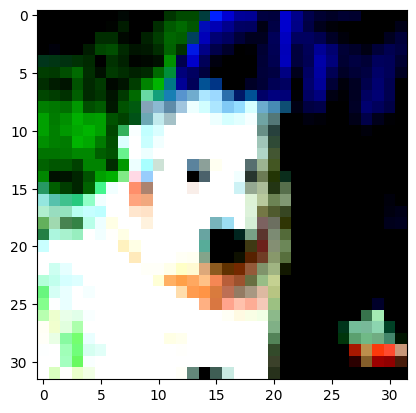

In [14]:
plt.imshow(x_test[444])

In [ ]:
# CIFAR-10 class labels
cifar10_labels = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

In [ ]:
# Function to show prediction vs reality
def predict_and_show(idx):
    img = x_test[idx]
    true_class = y_test_trans[idx]
    
    pred_prob = model_2.predict(np.expand_dims(img, axis=0), verbose=0)
    pred_class= np.argmax(pred_prob)

    restored_img = (img * std + mean).astype(np.uint8)
    
    if restored_img.ndim == 4:
        restored_img = restored_img[0]
  
    plt.imshow(restored_img)
    plt.title(f'Reality: {cifar10_labels[true_class]}\nPrediction: {cifar10_labels[pred_class]}')
    plt.axis('off')
    plt.show()

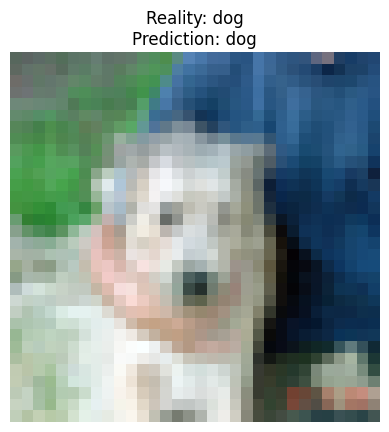

In [23]:
predict_and_show(444)

In [ ]:
# Function to show prediction with probability distribution
def predict_with_probs(idx):
    img = x_test[idx]
    true_class = y_test_trans[idx]

    probs = model_2.predict(np.expand_dims(img, axis=0), verbose=0)[0]
    pred_class = np.argmax(probs)

    restored_img = (img * std + mean).astype(np.uint8)

    if restored_img.ndim == 4:
        restored_img = restored_img[0]

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    axs[0].imshow(restored_img)
    axs[0].axis('off')
    axs[0].set_title(f'Reality: {cifar10_labels[true_class]}\nPrediction :{cifar10_labels[pred_class]}')

    axs[1].barh(cifar10_labels, probs, color='skyblue')
    axs[1].set_xlim(0, 1)
    axs[1].set_title('Class Probability')
    axs[1].invert_yaxis()
    for i, v in enumerate(probs):
        axs[1].text(v + 0.01, i, f'{v:.2f}', va='center')

    plt.tight_layout()
    plt.show()

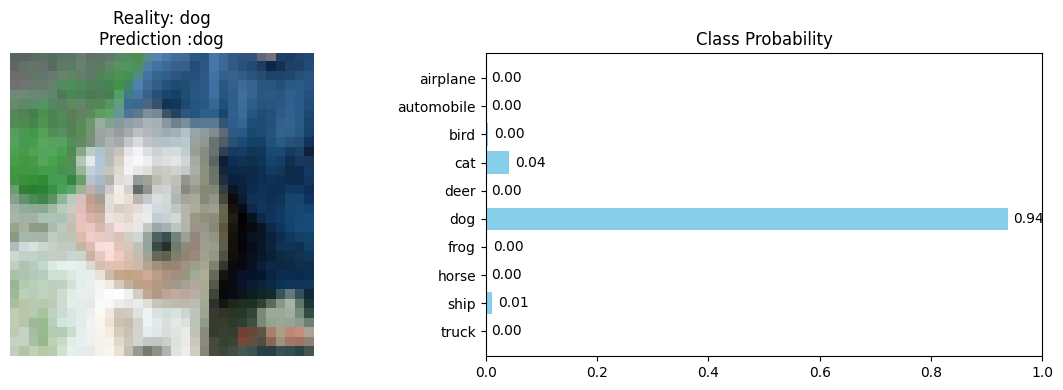

In [30]:
predict_with_probs(444)